In [1]:
#Plotting libraries
import numpy as np
import pandas as pd
from scipy import stats
import pickle                            #LOADING AND CLEANING DATA
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Show plots inline
%matplotlib inline

In [2]:
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')

df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
df.head()

,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
1,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
2,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
3,2,196,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
4,2,196,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [5]:
print(df.shape)

(5242, 13)


In [6]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,7.814765,682.359214,7.763640,6.094360,677.842999,530.202926,17.525754,2070.781000,17.447921,15.710718,2064.795498,1943.829194
std,27.445539,2417.020821,27.343341,10.656380,2407.997270,937.773493,31.726859,3404.747532,31.645749,18.427478,3401.356026,2739.969899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.909309,0.000000,62.009611,1.000000,71.000000,1.000000,1.020725,71.000000,98.670691
50%,1.000000,66.000000,1.000000,1.021459,66.000000,98.762821,1.000000,98.000000,1.000000,1.430508,98.000000,192.470941
75%,1.000000,98.000000,1.000000,1.038462,98.000000,99.485632,37.000000,3696.000000,37.000000,34.969697,3541.000000,2313.000000
max,211.000000,18581.000000,211.000000,76.750000,18581.000000,6711.000000,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 0 to 5242
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Delta Forward Packets                          5242 non-null   int64  
 1   Delta Forward Bytes                            5242 non-null   int64  
 2   Forward Instantaneous Packets per Second       5242 non-null   float64
 3   Forward Average Packets per second             5242 non-null   float64
 4   Forward Instantaneous Bytes per Second         5242 non-null   float64
 5   Forward Average Bytes per second               5242 non-null   float64
 6   Delta Reverse Packets                          5242 non-null   float64
 7   Delta Reverse Bytes                            5242 non-null   float64
 8   DeltaReverse Instantaneous Packets per Second  5242 non-null   float64
 9   Reverse Average Packets per second             5242 

In [8]:
df['Traffic Type'] = df['Traffic Type'].astype('category')

In [9]:
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [10]:
df['Traffic Type'].cat.codes.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [11]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [12]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

In [13]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

In [15]:
model = LogisticRegression(max_iter=10000)

In [16]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [17]:
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

In [18]:
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted voice and it was actually voice


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
predictions = model.predict(X_test)

In [20]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
3156,dns,dns
2530,voice,voice
3129,dns,dns
2301,voice,voice
2746,voice,voice


In [21]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.69%


In [22]:
print(pickle.format_version)

4.0


In [23]:
pickle.dump(model,open('LogisticRegression','wb'))

In [24]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[569   1   1   3]
 [  0 892   0   0]
 [  2   0 582   0]
 [  0   0   1 570]]


In [25]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns     569     1       1      3
ping      0   892       0      0
telnet    2     0     582      0
voice     0     0       1    570


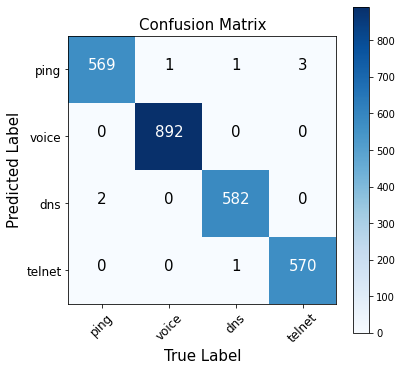

In [26]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [69]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_train, y_train
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

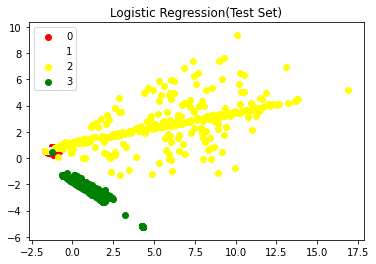

In [70]:
plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','white','yellow','green')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','white','yellow','green'))(i) ,label= j) 
plt.title('Logistic Regression(Test Set)')

plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

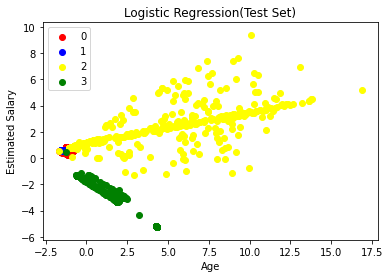

In [71]:
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue','yellow','green'))(i) ,label= j) 
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [27]:
df.drop('Traffic Type',axis=1).values[0:5]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  1. , 98. ,  1. ,  0.5, 98. ,
        49. ]])

In [28]:
df.drop('Traffic Type',axis=1).values.mean(axis=0)

array([   7.81476536,  682.35921404,    7.76363983,    6.09435952,
        677.84299886,  530.2029264 ,   17.52575353, 2070.78099962,
         17.44792064,   15.71071753, 2064.7954979 , 1943.8291939 ])

In [29]:
df.drop('Traffic Type',axis=1).values.std(axis=0)

array([  27.44292102, 2416.7902663 ,   27.34073283,   10.65536331,
       2407.76757632,  937.68404081,   31.72383282, 3404.4227598 ,
         31.64272994,   18.42572049, 3401.03157782, 2739.70853918])

In [30]:
scaler = StandardScaler()       
scaler.fit(df.drop('Traffic Type',axis=1))

StandardScaler()

In [31]:
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]

array([[-0.28476434, -0.2823411 , -0.28395873, -0.5719523 , -0.28152344,
        -0.56543879, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.5209255 , -0.57947592, -0.51980094, -0.82551548,
        -0.57829381, -0.69161707]])

In [32]:
scaled_data.mean(axis=0)

array([ 0.00000000e+00, -2.16876837e-17,  0.00000000e+00,  1.73501469e-16,
       -2.16876837e-17,  0.00000000e+00, -5.42192091e-17,  3.25315255e-17,
        3.25315255e-17, -5.42192091e-17, -9.21726555e-17, -2.16876837e-17])

In [33]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [35]:
scaled_data.shape

(5242, 12)

In [36]:
x_pca = pca.transform(scaled_data)

In [37]:
x_pca.shape

(5242, 2)

In [38]:
pca.explained_variance_ratio_

array([0.5646886, 0.2769479])

In [39]:
pca.explained_variance_ratio_.sum()*100

84.16364984328655

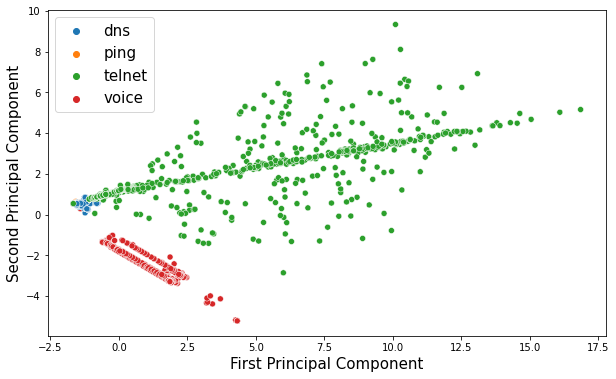

In [40]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1], hue=df['Traffic Type'])
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y.cat.codes,test_size=0.3, random_state=101)

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 88.87%


In [44]:
x_min = x_pca[:,0].min()
x_max = x_pca[:,0].max()
y_min = x_pca[:,1].min()
y_max = x_pca[:,1].max()
spacing = 0.01

In [45]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

In [46]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

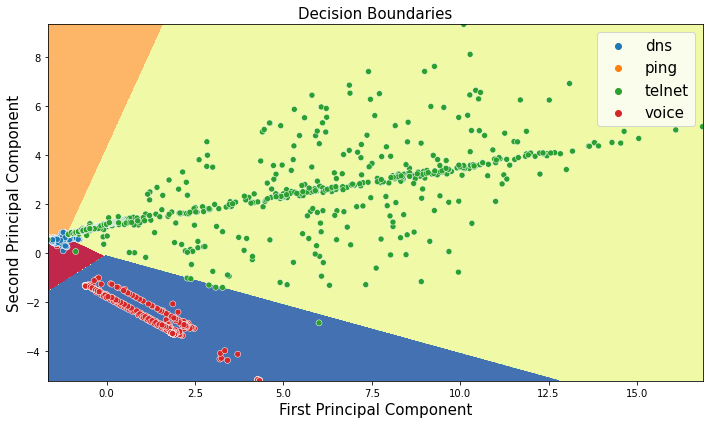

In [47]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=df['Traffic Type'])
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

In [48]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']                           #K-MEANS CLUSTERING

In [49]:
model = KMeans(n_clusters=len(y.cat.categories))

In [50]:
clusters = model.fit_predict(X)

In [51]:
model.cluster_centers_.shape

(4, 12)

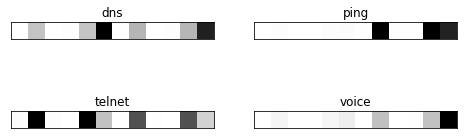

In [52]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 12)), cmap=plt.cm.binary)

In [53]:
df['Traffic Type'].value_counts()

ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

In [54]:
y_codes =  np.asarray(y.cat.codes)

In [55]:
y_codes.tolist().count(0) #DNS

1154

In [56]:
y_codes.tolist().count(1) #Ping

1770

In [57]:
y_codes.tolist().count(2) #Telnet

1181

In [58]:
y_codes.tolist().count(3) #Voice

1137

In [59]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y, strlabels)*100.0

30.808851583365126

In [61]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

In [62]:
y_codes =  np.asarray(y.cat.codes)

In [63]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

[1 1 1 ... 1 1 1]


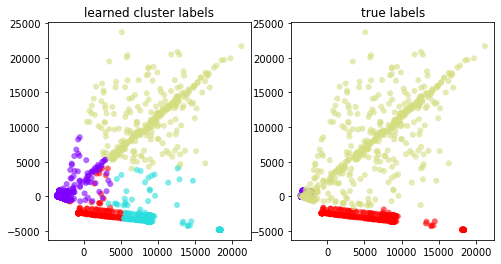

In [64]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

In [65]:
clusters = model.fit_predict(X)

In [66]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
cm

array([[   0,    0, 1770,    0],
       [ 982,  152,    3,    0],
       [   0,    0, 1154,    0],
       [  28,   16,  828,  309]], dtype=int64)

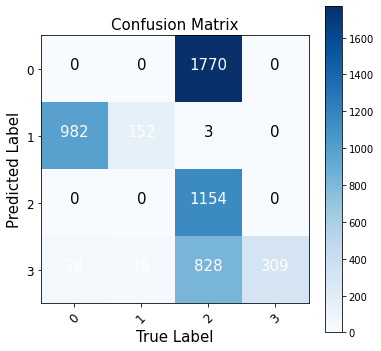

In [67]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [68]:
pickle.dump(model,open('KMeans_Clustering','wb'))